In [7]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center> TD - Langage assembleur </span>

Le but du TD n'est évidemment d'être capable de faire de la programmation en  assembleur mais seulement d'avoir un idée de comment fonctionne ce langage.

## 1. Le simulateur

Peter Higginson met à disposition sur le web un **simulateur en ligne du langage assembleur AQA**.

Les manipulations à faire seront donc toutes sur le site suivant : [http://www.peterhigginson.co.uk/AQA/](http://www.peterhigginson.co.uk/AQA/)
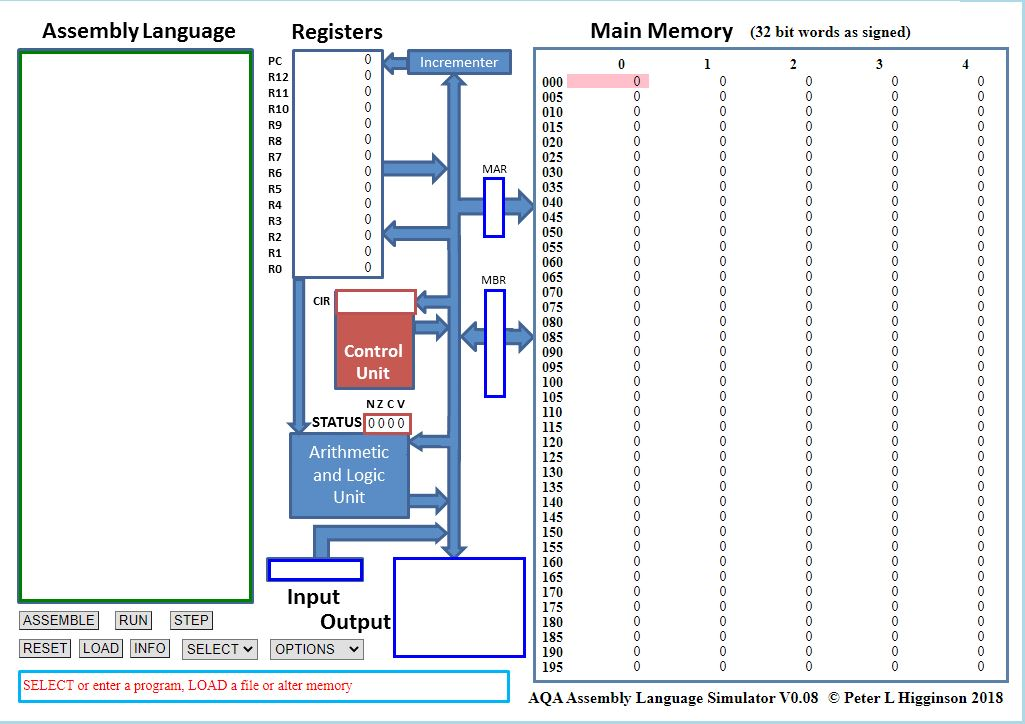

La **fenêtre de gauche** est celle où on écrit les **instructions en assembleur**.

Celle de **droite** représente en temps réel l'**état de la mémoire vive** qui s'appelle ici "Main Memory". Elle est constituée de 200 cellules dont les adresses vont de 0 à 199. La cellule d'adresse 047, par exemple, est située dans la 3ème colonne (colonne 2) de ligne 045.

**Entre les deux**, on voit le **microprocesseur** lui-même avec ses **registres** (13 registres numérotés de R0 à R12 plus le registre PC qui est reservé pour l'adresse mémoire de l'instruction en cours), son **UAL** et son **unité de contrôle**.

Lors de l'éxecution, nous pourrons y voir **circuler les données entre tous ses éléments** au fur et à mesure de l'exécution, **de l'entrée (Input) jusqu'à la sortie (Output)**.

## 2. Prise en main

### 2.1 Affichage des données en mémoire

Par défaut, le contenu de la RAM est affiché sous forme d'entiers signés en base 10 (*signed*). Mais à l'aide du bouton *OPTIONS*, on peut modifier cet affichage pour avoir des entiers non-signés en base 10 (*unsigned*) ou en base 19 (*hex*) ou enfin en binaire (*binary*).

**Remarque :** Le contenu des registres change également de format mais il passe en hexadécimal.

**Q1. Passer l'affichage de la mémoire en binaire, combien de bits et d'octets comporte chaque cellule de la mémoire ?**

**Réponse 1 :**

Votre réponse ici ...

### 2.2 Premier programme (pas de Hello World pour une fois !)

Voici 3 lignes de code en assembleur :

    MOV R0,#42
    STR R0,150
    HALT
    
La première ligne place le nombre 42 dans le registre R0, la deuxième stocke le contenu du registre R0 dans la cellule mémoire 150 et la dernière arrête le programme. On remarque qu'un **nombre précédé de `#` est une simple valeur numérique alors qu'un nombre seul correspond à une adresse mémoire**.

Ainsi `MOV`permet de **déplacer** une valeur numérique ou le contenu d'une cellule de la mémoire **vers un registre**.
Alors qu'à l'inverse, `STR` permet de **sauvegarder le contenu d'un registre en mémoire** pour une utilisation ultérieure.

**Q2. Recopier les 3 lignes de code ci-dessus dans la simulation, puis cliquer sur `Submit`. Que se passe-t-il en mémoire ?**

**Réponse 2 :**

Votre réponse ici ...

**Q3. En déduire à quelle instruction machine (nombre binaire sur 32 bits) correspond l'instruction assembleur `MOV R0,42`. Que remarquez-vous quant à la valeur du dernier octet de cette instruction machine ?**

**Réponse 3 :**

Votre réponse ici ...

**Q4. Exécutez le programme étape par étape avec le bouton `STEP` qui exécute une ligne d'assembleur à la fois (il faudra donc appuyer 3 fois pour terminer le programme) et observez la circulation des données dans le processeur. Que se passe-t-il pour le registre PC à chaque étape ?**

**Réponse 4 :**

Votre réponse ici ...

**Q5. Après la deuxième instruction, qu'indique l'adresse mémoire 150 ? Vérifier que c'est la bonne valeur en repassant l'affichage de la mémoire en `signed`.**

**Réponse 5 :**

Votre réponse ici ...

**Q6. Modifier le programme pour stocker la valeur de `R0` dans la mémoire `2` au lieu de `150` et appuyer sur `Submit`. Puis exécuter le programme depuis le début avec le bouton `RUN`. Vous pouvez régler la vitesse (20 au maximum) de la simulation avec les boutons `<<` et `>>` ou la mettre en pause avec le bouton `STOP`. La simulation affiche une erreur à l'étape 3, pourquoi ?**

**Réponse 6 :**

Votre réponse ici ...

**Remarque :** Si vous rafraichissez la page, vous réinitialisez la simulation mais vous perdez aussi le programme. Le bouton `RESET` permet de réinitialiser le processeur en remettant tous les registres à 0 mais laisse intact la mémoire vive. Celle-ci peut être effacée grâce à la commande `clr memory` du bouton `OPTIONS`. Pour remettre le programme assembleur dans la mémoire, il faut alors cliquer sur `ASSEMBLE` ou alors modifier le programme et cliquer sur `Submit`.

**Q7. Modifier le programme pour stocker la valeur de `54` dans la mémoire `50` en utilisant le registre `R1`, puis exécuter à nouveau le programme afin de vérifier le résultat obtenu.**

**Réponse 7 :**

Votre programme ici ...

## 3. Ecrire quelques programmes simples en assembleur

### 3.1 Faire des additions

L'instruction suivante permet d'additionner les registres `R0` et `R1` puis de placer le résultat dans le registre `R2`.

    ADD R2,R0,R1

**Q8.  Écrire puis tester un programme assembleur qui calcule et place en mémoire `100` la somme de `42` et `54`.**

**Réponse 8 :**

Votre programme ici ...

Pour lire et placer dans un registre une valeur stockée en mémoire, il faut utiliser la commande suivante :

    LDR R0,50

Cette instruction place dans le rgistre `R0` la valeur stockée dans la mémoire `50`.

**Q9.  Écrire puis tester un programme assembleur qui commencer par placer dans les mémoires `50`, `100` et `150` les valeurs `42`, `50` et `92` puis qui calcule la somme de ces 3 nombres (sans placer le résultat en mémoire) en utilisant seulement 2 registres, `R0` et `R1` par exemple.**

**Réponse 9 :**

Votre programme ici ...

**Remarque :** Vous avez du voir qu'il tout à fait possible, lors d'une addition, d'utiliser le même registre pour le résultat et une des valeurs à ajouter.

### 3.2 Faire des boucles

On veut à présent **calculer $2^5$ mais seulement en faisant des additions**. C'est possible de le faire avec la même technique que précédemment, mais il va falloir beaucou, beaucoup d'instructions.

On peut le faire beaucoup plus efficacement avec un **boucle while**, selon le **pseudo-code** suivant :

    x=2
    i=1
    tant que (i différent de 5) faire
        x=x+x
        i=i+1

En assembleur, cela se traduit par le **programme assembleur** suivant :

        MOV R0,#2
        MOV R1,#1
    maboucle:
        ADD R0,R0,R0
        ADD R1,R1,#1
        CMP R1,#5
        BNE maboucle
        STR R0,100
        HALT

L'instruction `maboucle:` est un **label**. C'est une **sorte de repère dans le programme** vers lequel on peut faire revenir ou sauter le programme (suivant qu'on est situé plus loin ou avant dans le programme). En fait, le label correspond à l'adresse en mémoire vive de l'instruction qui est située jute après.

L'instruction `CMP R1,#5` effectue une **comparaison** entre la valeur du registre `R1` et la valeur `5`. Et l'instruction suivante `BNE maboucle` effectue un **branchement** (un saut) vers le label `maboucle` mais seulement si le résultat de la comparaison est `NE`, c'est-à-dire *NOT EQUAL*.

Ainsi, tant que `R1` n'est pas égal à 5, le programme est renvoyé au label `maboucle` et continue à additionner `R0`avec lui-même et donc à le doubler. `R1` est incrémenter à chaque tour, c'est notre compteur de boucle `i`.

**Q10. Copier et tester le programme assembleur précédent, puis le modifier pour calculer $2^{10}$.**

**Réponse 10 :**

Votre programme modifié ici ...

**Q11. Modifier et tester le programme assembleur précédent, pour calculer la somme des 10 premiers entiers.**

**Réponse 10 :**

Votre programme ici ...

### 3.3 Traduire du Python en assembleur

Voici un petit script en **Python** :

```python
x = 4
y = 8
if x == 10:
	y = 9
else :
	x=x+1
z=6
```
Et sa traduction en **assembleur** :

```
   MOV R0, #4
   STR R0,30
   MOV R0, #8
   STR R0,75
   LDR R0,30
   CMP R0, #10
   BNE else
   MOV R0, #9
   STR R0,75
   B endif
else:
   LDR R0,30
   ADD R0, R0, #1
   STR R0,30
endif:
   MOV R0, #6
   STR R0,23
   HALT
```
**Remarque :** L'instruction `B endif` permet de sauter au label `endif` sans condition. Ainsi après la comparaison entre `R0` et `10`, soit on saute au label `else`, soit on exévute le `MOV` et le `STR` qui suit avant de sauter jusqu'au label `endif`. On retrouve bien le fonctionnement d'un *if ... then ... else*.

**Q12. Copier et tester ce programme assembleur dans le simulateur. A quelles adresses mémoires sont stockées les variables `x`, `y` et `z` ? Quelles sont leurs valeurs à la fin du programme ?**

**Réponse 12 :**

Votre réponse ici ...

Voici un autre code en Python :

```python
x = 4
y = 8
if x == y :
    y = x +4
else :
    y = x + y
```

**Q13. Traduire et tester en assembleur le code Python précédent.**

**Réponse 13 :**

Votre programme ici ...

**QBONUS. Pour les plus courageux, écrire un programme assembleur qui teste 3 nombres entiers afin de stocker en mémoire le plus grand des 3.**

**Réponse BONUS :**

Votre programme ici ...